# Step 1: Importing Libraries and the data

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data from the dataframe 'Leads'

df = pd.read_csv('Leads.csv')

In [4]:
# Looking at the first few entries

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspecting the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Inspecting the shape of the dataset

df.shape

(9240, 37)

In [7]:
# Checking the summary of the dataset

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 1.1- Cleaning the data 

In [8]:
# Converting all values to lowercase

df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Replacing 'select' with 'NaN' (Means no option has selected)

df = df.replace('select', np.nan)

In [10]:
# Checking columns with only one unique value because it will not affect our analysis

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# 'prospect id' and 'lead number' both have unique values so dropping those two

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
# Dropping those columns with only one unique value

df1 = df.drop(['Magazine',
              'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content',
              'Get updates on DM Content',
              'I agree to pay the amount through cheque'], 1, inplace = True)

In [13]:
# Checking percentage of null values in each of the column

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Dropping The Columns with Null values >=35%

In [14]:
cols = df.columns

for i in cols:
    if ((100*(df[i].isnull().sum()/len(df.index))) >= 35):
        df.drop(i, 1, inplace = True)

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [16]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,no,no,no,no,no,no,no,modified


#### 
1) There is huge count of missing values in 3 columns

2) But, we cannot drop them because it will cost lot of data as they can be important columns

3) So, replace 'NaN' values with 'not provided'

In [20]:
# Replacing 'NaN' values with 'not provided'

df['Country'] = df['Country'].fillna('not provided')

df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [22]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [23]:
df.shape

(9240, 20)

# Step 2: Data Visualisation(EDA)

### 2.1 Categorical variables analysis

In [24]:
# Number of Values count in 'Country' column

df['Country'].value_counts(dropna = False)

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

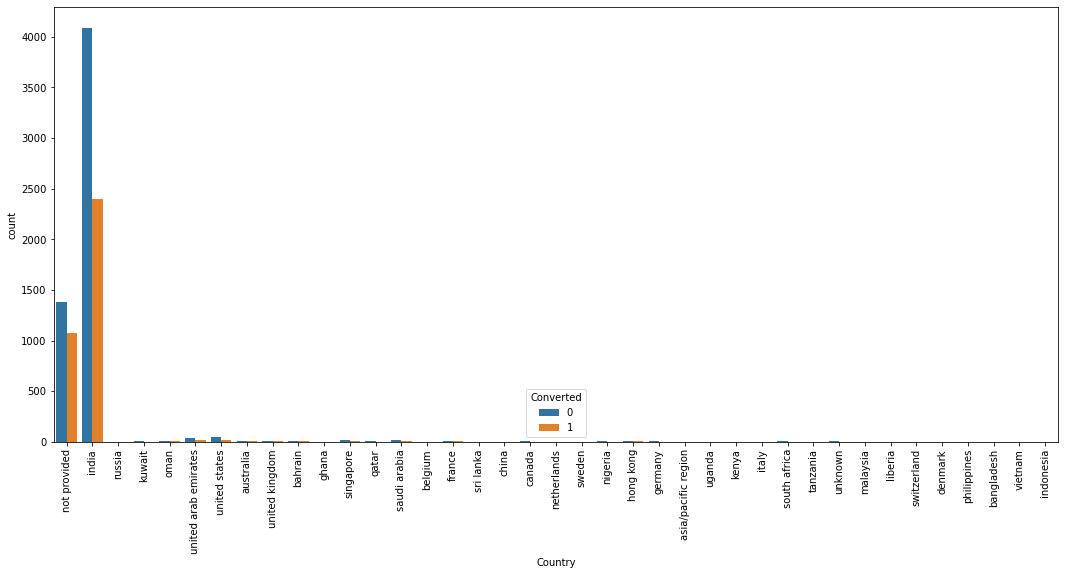

In [25]:
# Visualising the 'Country' variable based on converted value

plt.figure(figsize = (18,8))
s1 = sns.countplot(x = 'Country', hue = 'Converted', data = df)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)

plt.show()

#### Inference from plot:

1) India is the most common occurence among the non-missing values

2) We can impute all missing values with India

In [26]:
df['Country'] = df['Country'].replace(np.nan, 'India')

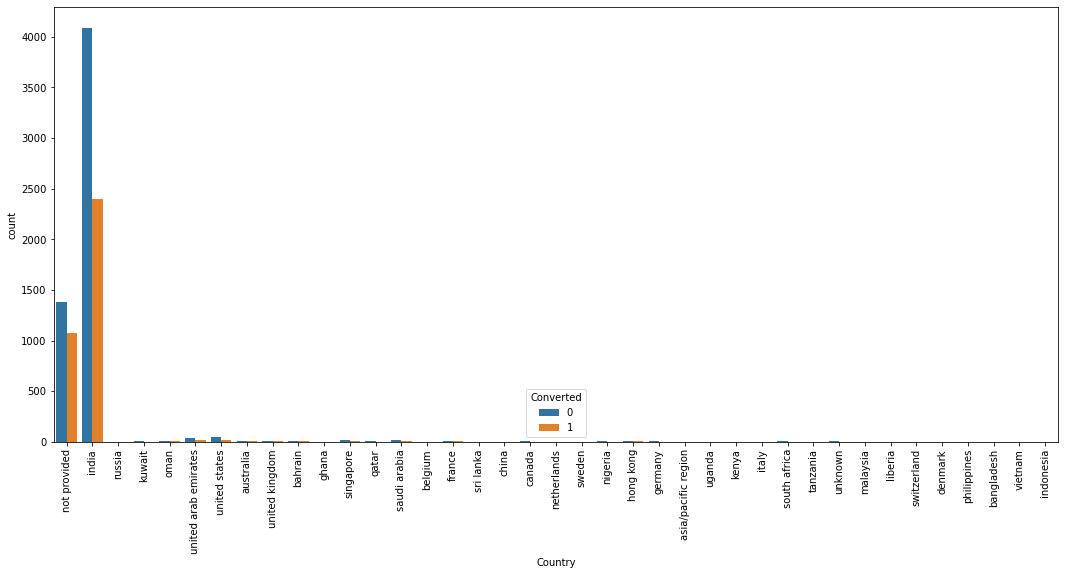

In [27]:
# Visualising the 'Country' variable based on converted value after replacing NaN values

plt.figure(figsize = (18,8))
s1 = sns.countplot(x = 'Country', hue = 'Converted', data = df)
s1.set_xticklabels(s1.get_xticklabels(), rotation = 90)
plt.show()

#### Inference from plot:

1) As number of values for India are quite high, so this can be dropped

In [28]:
# Creating list of the columns to be dropped

cols_to_drop = ['Country']

In [29]:
# Checking value counts of 'What is your current occupation' column

df['What is your current occupation'].value_counts(dropna = False)

unemployed              5600
not provided            2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
# Imputing 'not provided' values with mode 'unemployed'

df['What is your current occupation'] = df['What is your current occupation'].replace('not provided', 'unemployed')

In [31]:
# Checking count of values

df['What is your current occupation'].value_counts(dropna = False)

unemployed              8290
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

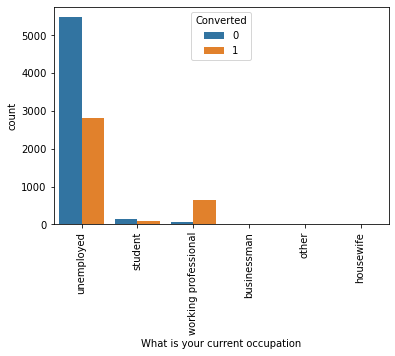

In [32]:
# Visualizing count of Variable 'What is your current occupation' based on Converted value

s1 = sns.countplot(df['What is your current occupation'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)

plt.show()

#### Inference from plot:

1) Working Professionals going for the course have high chances of joining it.

2) Unemployed leads are having most terms of Absolute numbers 

In [33]:
# Checking value counts of 'What matters most to you in choosing a course' column

df['What matters most to you in choosing a course'].value_counts(dropna = False)

better career prospects      6528
not provided                 2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
# Imputing 'not provided' values with mode 'better career prospects'

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace('not provided', 'better career prospects')

In [35]:
# Checking value counts of variable 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna = False)

better career prospects      9237
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

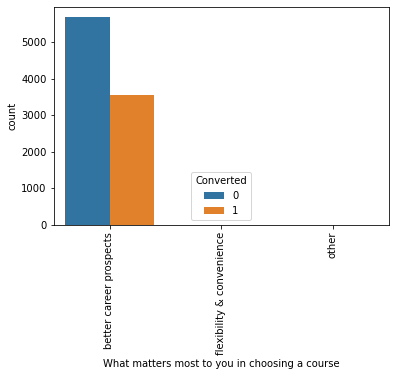

In [36]:
# Visualizing count of Variable 'What matters most to you in choosing a course' based on Converted value

s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

In [37]:
# Here again, we have another Column that is worth Droppin. 
# So we Append to the cols_to_drop List that we created earlier

cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [38]:
# Checking value counts of 'Lead Source' column

df['Lead Source'].value_counts(dropna = False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [39]:
# Replacing Nan Values and combining low frequency values

df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('facebook','Social Media')

In [40]:
df['Lead Source'] = df['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel' 'testone','pay per click ads',
                                                     'welearnblog_home','welearn','blog',
                                                     'nc_edm'] ,'Others')

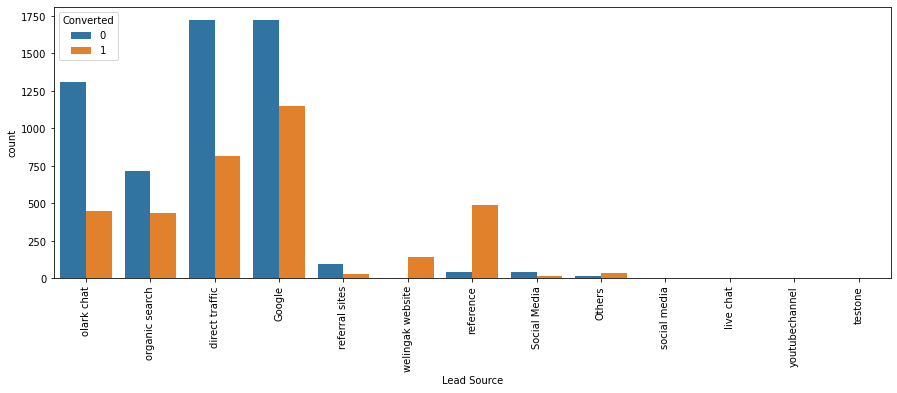

In [41]:
# Visualizing count of Variable 'Lead Source' based on Converted value

plt.figure(figsize = (15,5))

s1 = sns.countplot(df['Lead Source'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)

plt.show()

#### Inference from plot:

1) Maximum number of leads are generated by Google and Direct traffic

2) Conversion Rate of reference leads and leads through welingak website is high

3) To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads. Also to generate more leads from reference

In [42]:
# Checking value counts of 'Last Activity' column

df['Last Activity'].value_counts(dropna = False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
# Replacing 'Nan' Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['unreachable','unsubscribed',
                                                        'had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link clicked',       
                                                        'email received',                  
                                                        'email marked spam','visited booth in tradeshow',
                                                         'resubscribed to emails'],'Others')

In [44]:
# Checking value counts of 'Last Activity' column again

df['Last Activity'].value_counts(dropna = False)

email opened                 3437
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
Others                        308
email link clicked            267
form submitted on website     116
Name: Last Activity, dtype: int64

In [45]:
# Checking the Null Values in All Columns

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [46]:
# Drop all rows which have Nan Values, Since the total number of Dropped rows is less than 2%, it will not affect the model

df = df.dropna()

In [47]:
# Checking the Null Values in All Columns again

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

In [48]:
# Checking value counts of 'Lead Origin' column

df['Lead Origin'].value_counts(dropna = False)

landing page submission    4886
api                        3578
lead add form               608
lead import                  31
Name: Lead Origin, dtype: int64

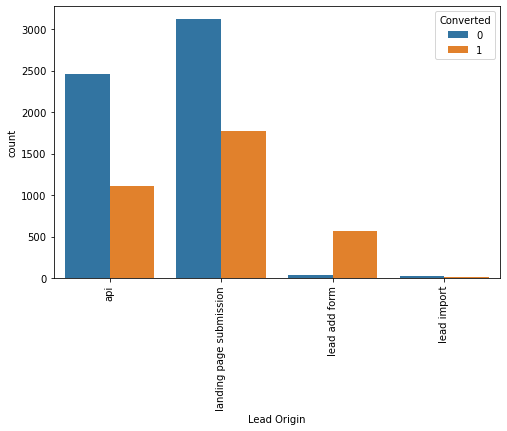

In [49]:
# Visualizing count of Variable 'Lead Origin' based on Converted value

plt.figure(figsize = (8,5))

s1 = sns.countplot(df['Lead Origin'], hue = df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)

plt.show()

#### Inference from plot:

1) API and Landing Page Submission having higher number of leads as well as conversion

2) Lead Import and lead Add Form get very few leads

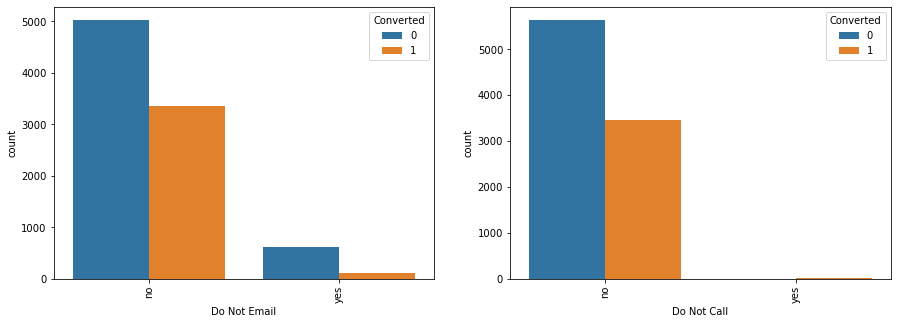

In [50]:
# Visualizing count of Variables 'Do Not Email' and 'Do Not Call' based on Converted value

plt.figure(figsize = (15, 5))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(df['Do Not Email'], hue = df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(df['Do Not Call'], hue = df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

plt.show()

In [51]:
# Checking value counts for variable 'Do Not Email'

df['Do Not Email'].value_counts(dropna = False)

no     8379
yes     724
Name: Do Not Email, dtype: int64

In [52]:
# Checking value counts for variable 'Do Not Call'

df['Do Not Call'].value_counts(dropna = False)

no     9101
yes       2
Name: Do Not Call, dtype: int64

In [53]:
# we can append 'Do Not Call' to cols_to_drop list. Since, large number of values are present in 'no' only

cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

#### Some imbalanced variables which can be dropped are:

In [54]:
# Search

df.Search.value_counts(dropna = False)

no     9089
yes      14
Name: Search, dtype: int64

In [55]:
# Newspaper Article

df['Newspaper Article'].value_counts(dropna = False)

no     9101
yes       2
Name: Newspaper Article, dtype: int64

In [56]:
# X Education Forums

df['X Education Forums'].value_counts(dropna = False)

no     9102
yes       1
Name: X Education Forums, dtype: int64

In [57]:
# Newspaper

df['Newspaper'].value_counts(dropna = False)

no     9102
yes       1
Name: Newspaper, dtype: int64

In [58]:
# Digital Advertisement

df['Digital Advertisement'].value_counts(dropna = False)

no     9099
yes       4
Name: Digital Advertisement, dtype: int64

In [59]:
# Through Recommendations

df['Through Recommendations'].value_counts(dropna = False)

no     9096
yes       7
Name: Through Recommendations, dtype: int64

In [60]:
# A free copy of Mastering The Interview

df['A free copy of Mastering The Interview'].value_counts(dropna = False)

no     6215
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [61]:
# Adding imbalanced columns to the list of columns that we dropped earlier

cols_to_drop.extend(['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations'])

In [62]:
# Checking value counts for variable 'last Notable Activity'

df['Last Notable Activity'].value_counts()

modified                        3270
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [63]:
# Now, clubbing the lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['email bounced', 'unsubscribed',
                                                                       'unreachable', 'had a phone conversation',
                                                                         'email marked spam', 'approached upfront',
                                                                         'resubscribed to emails', 'view in browser link clicked',
                                                                         'form submitted on website', 'email received'], 'other_notable_activity')                                                                   

In [64]:
# Checking value counts for variable 'last Notable Activity' again

df['Last Notable Activity'].value_counts()

modified                   3270
email opened               2827
sms sent                   2172
page visited on website     318
olark chat conversation     183
email link clicked          173
other_notable_activity      160
Name: Last Notable Activity, dtype: int64

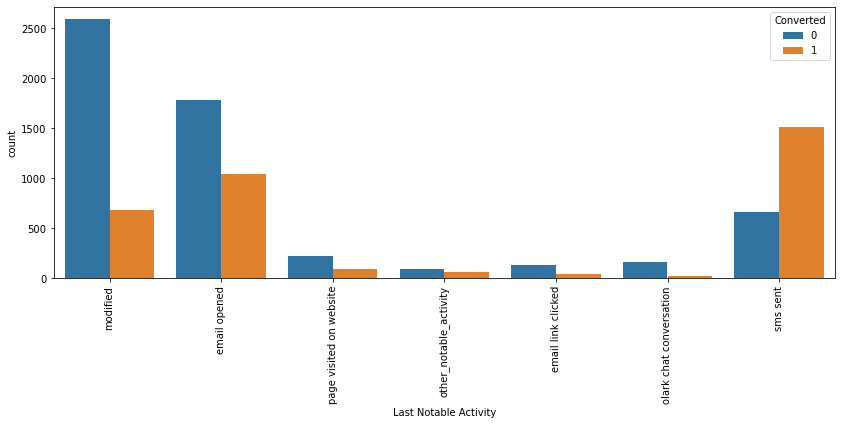

In [65]:
# Visualizing count of Variable 'Last Notable Activity' based on Converted value

plt.figure(figsize = (14,5))

ax1 = sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)

plt.show()

In [66]:
# final List of the columns to be dropped

cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [67]:
# dropping columns

df = df.drop(cols_to_drop, 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

### 2.2 Numerical variables analysis 

In [68]:
# Checking the percentage(%) of Data that has Converted Values = 1

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100

Converted

38.02043282434362

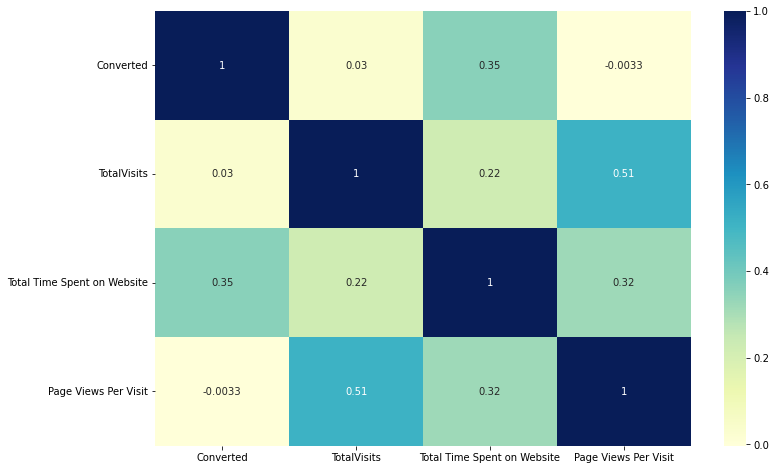

In [69]:
# Checking correlations of numerical variables using heatmap

plt.figure(figsize = (12,8))

sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
           
plt.show()

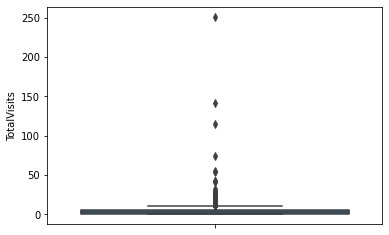

In [70]:
# Visualizing spread of variable 'Total Visits'

plt.figure(figsize = (6,4))

sns.boxplot(y = df['TotalVisits'])

plt.show()

#### Inference from plot:
1) There is presence of outliers clearly seen

In [71]:
# Checking percentile values for 'TotalVisits'

df['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

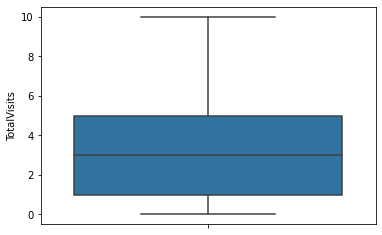

In [72]:
# Outliers treatment: For analysis, caping the outliers to 95% value

percentiles = df['TotalVisits'].quantile([0.05, 0.95]).values

df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

sns.boxplot(y = df['TotalVisits'])

plt.show()

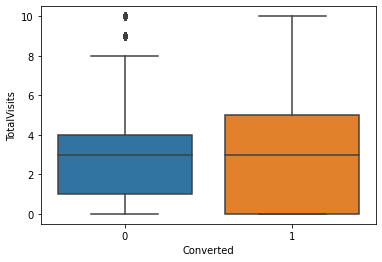

In [73]:
# Now, visualising variable 'TotalVisits' with respect to target variable-'Converted'

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

plt.show()

#### Inference from plot:
1) Median for both 'Converted' and 'Non-Converted' leads are same

2) Nothing can be conclusive feom varaible 'TotalVisits

In [74]:
# Checking percentile values for variable 'Total Time Spent on Website'

df['Total Time Spent on Website'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

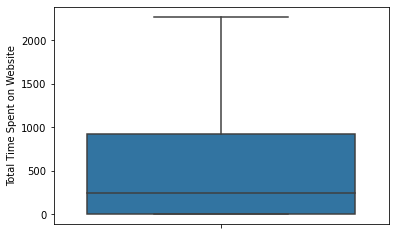

In [75]:
# Visualising variable 'Total Time Spent on Website' using boxplot

sns.boxplot(y = df['Total Time Spent on Website'])

plt.show()

#### Inference from plt:
1) As there are no any major outliers, no outlier treatment required for variable 'Total Time Spent on Website 

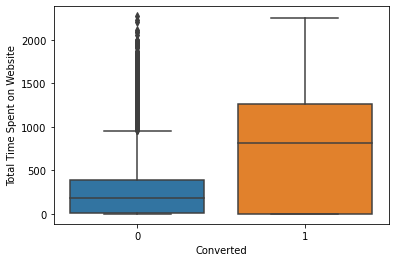

In [76]:
# Now, visualising variable 'Total Time Spent on Website' with respect to target variable-'Converted'

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

plt.show()

#### Inference from plot:
1) Leads spending more time on website are more likely to convert

2) Website shoud be made more engaging to increase conversion rate 

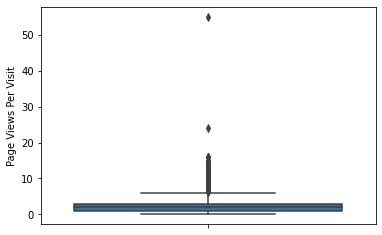

In [77]:
# Visualising variable 'Page Views Per Visit' using boxplot

sns.boxplot(y = df['Page Views Per Visit'])

plt.show()

#### Inference from plot:
1) Clearly outliers can be seen above, so outliers treatment is required 

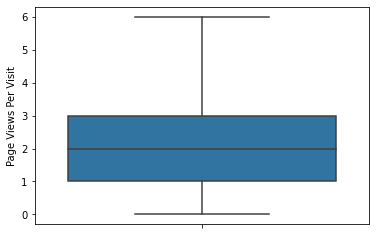

In [78]:
# Outliers treatment: For analysis, caping the outliers to 95% value

percentiles = df['Page Views Per Visit'].quantile([0.05, 0.95]).values

df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

sns.boxplot(y = df['Page Views Per Visit'])

plt.show()

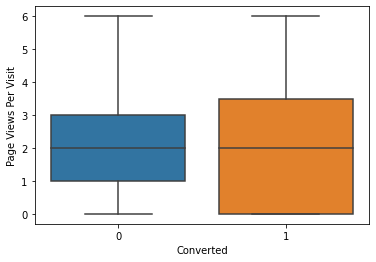

In [79]:
# Now, visualising variable 'Page Views Per Visit' with respect to target variable-'Converted'

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

plt.show()

#### Inference from above plot:
1) Median for both 'Converted' and 'Non-Converted' leads are same

2) Nothing can be conclusive feom varaible 'Page Views Per Visit' 

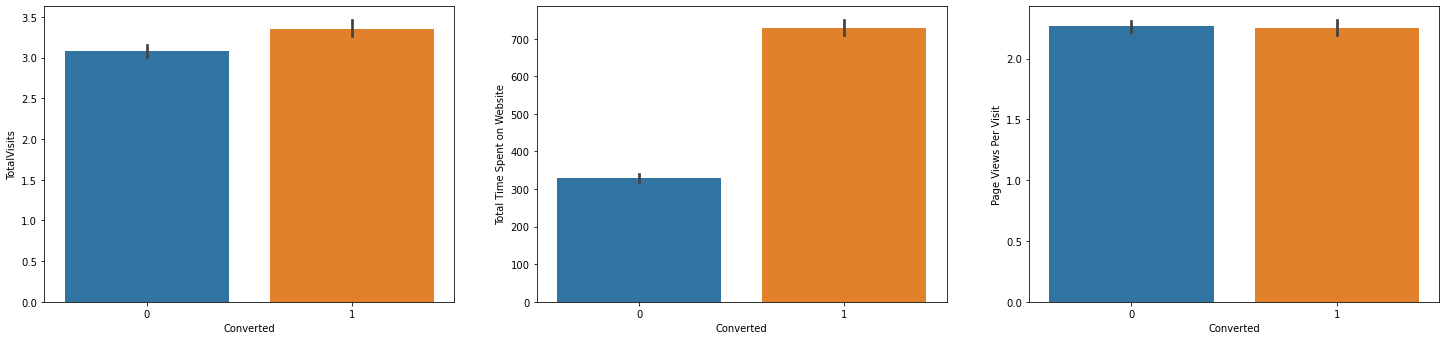

In [80]:
# Now lets check conversion for all numerical variables

plt.figure(figsize = (25,25))

plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = df)

plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

plt.show()

#### Inference from above plot:
1) Conversion rates for 'TotalVisits' and 'Page Views Per Views' variables are high

# Step 3: Data Preparation

In [81]:
# list of categorical columns

cat_cols = df.select_dtypes(include=['object']).columns

cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

df[varlist] = df[varlist].apply(binary_map)

In [83]:
# Getting dummies and dropping the first column
# Also, adding the results to the master dataframe

dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation']], drop_first = True)

df = pd.concat([df,dummy],1)

In [84]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')

dummy = dummy.drop(['Lead Source_Others'], 1)

df = pd.concat([df, dummy], axis = 1)

In [85]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')

dummy = dummy.drop(['Last Activity_Others'], 1)

df = pd.concat([df, dummy], axis = 1)

In [86]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')

dummy = dummy.drop(['Last Notable Activity_other_notable_activity'], 1)

df = pd.concat([df, dummy], axis = 1)

In [87]:
# Dropping the original columns after dummy variable creation

df.drop(cat_cols, 1, inplace = True)

In [88]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,...,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Step 4: Train-Test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
# Putting feature var. to X

X = df.drop('Converted', axis = 1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,...,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [91]:
# Putting response var. to y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
# Splitting train-test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Step 5: Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
# Scaling of numerical features

scaler = StandardScaler()

num_cols = X_train.select_dtypes(include = ['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,...,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
7962,-0.068258,1.476324,-0.423364,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5520,1.362470,-0.771066,2.083179,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1962,0.647106,-0.571257,0.133646,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1566,2.435517,1.393834,0.690655,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9170,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Step 6: Model building using statsmodel and RFE

In [95]:
import statsmodels.api as sm

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select = 15)  #Running the RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [98]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True])

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_landing page submission', False, 20),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 7),
 ('What is your current occupation_housewife', True, 1),
 ('What is your current occupation_other', False, 14),
 ('What is your current occupation_student', True, 1),
 ('What is your current occupation_unemployed', True, 1),
 ('What is your current occupation_working professional', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Social Media', False, 23),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_live chat', False, 22),
 ('Lead Source_olark chat', False, 8),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_reference', False, 5),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 6),
 ('Lead Source_testone', False, 21),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubec

In [100]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'What is your current occupation_other', 'Lead Source_Social Media',
       'Lead Source_live chat', 'Lead Source_olark chat',
       'Lead Source_reference', 'Lead Source_social media',
       'Lead Source_testone', 'Lead Source_youtubechannel',
       'Last Activity_email link clicked', 'Last Activity_email opened',
       'Last Activity_form submitted on website',
       'Last Activity_page visited on website', 'Last Activity_sms sent',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [101]:
# list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'What is your current occupation_housewife',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Lead Source_Google', 'Lead Source_direct traffic',
       'Lead Source_organic search', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_olark chat conversation',
       'Last Notable Activity_sms sent'],
      dtype='object')

## Model - 1

In [102]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Creating a model and a fit
log_m1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = log_m1.fit()

In [103]:
# Summary

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.8
Date:                Sat, 12 Nov 2022   Deviance:                       5387.6
Time:                        23:52:14   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5686      0.567      1.002      0.316      -0.544       1.681
Total Time Spent on Website                              1.1091      0.039     28.131      0.000       1.032       1.186
Lead Origin_lead add form                                2.8137      0.228     12.367      0.000       2.368       3.260
What is your current occupation_housewife               22.4020    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_student                 -0.3750      0.608     -0.617      0.538      -1.567       0.817
What is your current occupation_unemployed              -0.8303      0.562     -1.476      0.140      -1.933       0.272
What is your current occupation_working professional     2.0236      0.590      3.427      0.001       0.866       3.181
Lead Source_Google                                      -0.9730      0.109     -8.905      0.000      -1.187      -0.759
Lead Source_direct traffic                              -1.3309      0.114    -11.664      0.000      -1.555      -1.107
Lead Source_organic search                              -1.1159      0.131     -8.495      0.000      -1.373      -0.858
Lead Source_referral sites                              -1.3499      0.340     -3.972      0.000      -2.016      -0.684
Lead Source_welingak website                             1.8640      0.755      2.468      0.014       0.383       3.345
Last Activity_converted to lead                         -1.2720      0.209     -6.086      0.000      -1.682      -0.862
Last Activity_email bounced                             -1.9704      0.315     -6.260      0.000      -2.587      -1.353
Last Activity_olark chat conversation                   -1.4834      0.159     -9.324      0.000      -1.795      -1.172
Last Notable Activity_sms sent                           1.4378      0.079     18.213      0.000       1.283       1.593
========================================================================================================================
"""

##### What is your current occupation_housewife can be dropped based on p-value (since, variables with p-value more than 0.05 will be dropped)

In [104]:
col = col.drop('What is your current occupation_housewife', 1)

## Model - 2

In [105]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Creating a model and a fit
log_m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = log_m2.fit()

In [106]:
# Summary

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.1
Date:                Sat, 12 Nov 2022   Deviance:                       5394.2
Time:                        23:55:59   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3820
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1772      0.492      2.395      0.017       0.214       2.141
Total Time Spent on Website                              1.1083      0.039     28.127      0.000       1.031       1.185
Lead Origin_lead add form                                2.8147      0.227     12.373      0.000       2.369       3.261
What is your current occupation_student                 -0.9840      0.538     -1.830      0.067      -2.038       0.070
What is your current occupation_unemployed              -1.4399      0.485     -2.968      0.003      -2.391      -0.489
What is your current occupation_working professional     1.4140      0.517      2.734      0.006       0.400       2.428
Lead Source_Google                                      -0.9701      0.109     -8.882      0.000      -1.184      -0.756
Lead Source_direct traffic                              -1.3315      0.114    -11.671      0.000      -1.555      -1.108
Lead Source_organic search                              -1.1109      0.131     -8.468      0.000      -1.368      -0.854
Lead Source_referral sites                              -1.3480      0.340     -3.968      0.000      -2.014      -0.682
Lead Source_welingak website                             1.8637      0.755      2.467      0.014       0.383       3.344
Last Activity_converted to lead                         -1.2722      0.209     -6.088      0.000      -1.682      -0.863
Last Activity_email bounced                             -1.9703      0.315     -6.260      0.000      -2.587      -1.353
Last Activity_olark chat conversation                   -1.4882      0.159     -9.351      0.000      -1.800      -1.176
Last Notable Activity_sms sent                           1.4373      0.079     18.210      0.000       1.283       1.592
========================================================================================================================
"""

#### From above it seems that, there is one variable which have a p-value greater than 0.05. We will need to take care of that. But first, let's also look at the VIFs.

In [107]:
# Check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_unemployed,7.09
5,Lead Source_Google,3.39
6,Lead Source_direct traffic,3.09
7,Lead Source_organic search,1.94
1,Lead Origin_lead add form,1.82
4,What is your current occupation_working profes...,1.62
13,Last Notable Activity_sms sent,1.48
12,Last Activity_olark chat conversation,1.41
9,Lead Source_welingak website,1.32
0,Total Time Spent on Website,1.30


#### VIF value of  'What is your current occupation_unemployed' variable is 7.09 which is more than 5, so it will be dropped

In [109]:
col = col.drop('What is your current occupation_unemployed', 1)

### Model-3

In [110]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Creating a model and a fit
log_m3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = log_m3.fit()

In [111]:
# Summary

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.6
Date:                Sun, 13 Nov 2022   Deviance:                       5403.2
Time:                        00:02:08   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3811
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2561      0.089     -2.883      0.004      -0.430      -0.082
Total Time Spent on Website                              1.1096      0.039     28.186      0.000       1.032       1.187
Lead Origin_lead add form                                2.8229      0.227     12.416      0.000       2.377       3.268
What is your current occupation_student                  0.4467      0.238      1.875      0.061      -0.020       0.914
What is your current occupation_working professional     2.8459      0.187     15.212      0.000       2.479       3.213
Lead Source_Google                                      -0.9675      0.109     -8.868      0.000      -1.181      -0.754
Lead Source_direct traffic                              -1.3241      0.114    -11.622      0.000      -1.547      -1.101
Lead Source_organic search                              -1.1013      0.131     -8.402      0.000      -1.358      -0.844
Lead Source_referral sites                              -1.3531      0.340     -3.983      0.000      -2.019      -0.687
Lead Source_welingak website                             1.8530      0.755      2.453      0.014       0.372       3.334
Last Activity_converted to lead                         -1.2846      0.209     -6.149      0.000      -1.694      -0.875
Last Activity_email bounced                             -1.9818      0.315     -6.298      0.000      -2.599      -1.365
Last Activity_olark chat conversation                   -1.4862      0.159     -9.344      0.000      -1.798      -1.174
Last Notable Activity_sms sent                           1.4260      0.079     18.096      0.000       1.272       1.580
========================================================================================================================
"""

#### From above it seems that, there is one variable 'What is your current occupation_student' has a p-value greater than 0.05, needs to be dropped

In [113]:
col = col.drop('What is your current occupation_student', 1)

### Model- 4 

In [114]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Creating a model and a fit
log_m4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = log_m4.fit()

In [115]:
# Summary

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.3
Date:                Sun, 13 Nov 2022   Deviance:                       5406.6
Time:                        00:06:49   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3808
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2438      0.089     -2.752      0.006      -0.417      -0.070
Total Time Spent on Website                              1.1094      0.039     28.189      0.000       1.032       1.187
Lead Origin_lead add form                                2.8304      0.227     12.454      0.000       2.385       3.276
What is your current occupation_working professional     2.8361      0.187     15.169      0.000       2.470       3.203
Lead Source_Google                                      -0.9724      0.109     -8.915      0.000      -1.186      -0.759
Lead Source_direct traffic                              -1.3237      0.114    -11.617      0.000      -1.547      -1.100
Lead Source_organic search                              -1.1040      0.131     -8.428      0.000      -1.361      -0.847
Lead Source_referral sites                              -1.3647      0.339     -4.020      0.000      -2.030      -0.699
Lead Source_welingak website                             1.8348      0.755      2.429      0.015       0.355       3.315
Last Activity_converted to lead                         -1.2877      0.209     -6.160      0.000      -1.697      -0.878
Last Activity_email bounced                             -1.9795      0.315     -6.285      0.000      -2.597      -1.362
Last Activity_olark chat conversation                   -1.4805      0.159     -9.315      0.000      -1.792      -1.169
Last Notable Activity_sms sent                           1.4213      0.079     18.064      0.000       1.267       1.576
========================================================================================================================
"""

#### All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [116]:
# Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_lead add form,1.49
11,Last Notable Activity_sms sent,1.39
7,Lead Source_welingak website,1.32
4,Lead Source_direct traffic,1.24
3,Lead Source_Google,1.22
0,Total Time Spent on Website,1.18
2,What is your current occupation_working profes...,1.16
5,Lead Source_organic search,1.11
8,Last Activity_converted to lead,1.10
10,Last Activity_olark chat conversation,1.08


#### All the VIF's are now in the appropriate range, so we are good to go ahead!

### Deriving the Predictions, Probabilities and Lead Score on Train Data

In [117]:
# Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.863293
5520    0.081444
1962    0.135880
1566    0.959543
9170    0.227728
5097    0.227728
8954    0.416640
309     0.159926
5519    0.549865
1050    0.505246
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86329343, 0.08144417, 0.13588049, 0.9595432 , 0.22772755,
       0.22772755, 0.41663978, 0.15992636, 0.5498648 , 0.50524606])

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.863293,7962
1,0,0.081444,5520
2,0,0.135880,1962
3,1,0.959543,1566
4,0,0.227728,9170


In [120]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.863293,7962,1
1,0,0.081444,5520,0
2,0,0.135880,1962,0
3,1,0.959543,1566,1
4,0,0.227728,9170,0


In [121]:
# Confusion Matrix

from sklearn import metrics

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

print(confusion)

[[3497  456]
 [ 734 1685]]


### Accuracy 

In [123]:
# Let's check the overall 'Accuracy'

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8132454488386692


In [124]:
TP = confusion[1,1]    # True positives 
TN = confusion[0,0]    # True negatives
FP = confusion[0,1]    # False positives
FN = confusion[1,0]    # False negatives

### Sensitivity

In [125]:
# Let's see the 'Sensitivity' of our logistic regression model

TP / float(TP+FN)

0.6965688300950806

### Specificity

In [126]:
# Let's calculate 'Specificity'

TN / float(TN+FP)

0.8846445737414622

### ROC Curve

In [127]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc = "lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

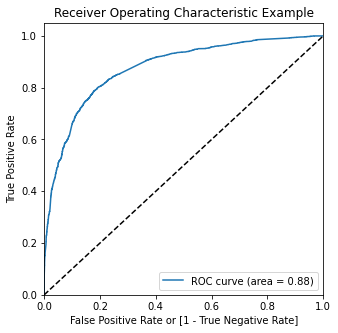

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Inference from above graph:

1) ROC value shoud be closer to 1

2) We are getting ROC value equal to 0.88, means we are getting a good model

### Finding Optimal Cutoff Point

####Above, we choose arbitary cut-off value as 0.5, so now we will find out best cutoff value####

In [130]:
# Lets create columns with different probability cut-offs

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)

In [131]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.863293,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.081444,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.135880,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.959543,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.227728,9170,0,1,1,1,0,0,0,0,0,0,0


In [132]:
# Now, lets find out 'Accuracy', 'Sensitivity' and 'Specificity' for various probability cut-offs

cutoff_df = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1]    # True positives 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total_1 = sum(sum(cm_1))
    Accuracy = (cm_1[0,0] + cm_1[1,1])/total_1
    Specificity = cm_1[0,0]/(cm_1[0,0] + cm_1[0,1])
    Sensitivity = cm_1[1,1]/(cm_1[1,0] + cm_1[1,1])
    
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.1          0.1  0.569994     0.970649     0.324817
0.2          0.2  0.727715     0.912360     0.614723
0.3          0.3  0.794570     0.821827     0.777890
0.4          0.4  0.810264     0.758165     0.842145
0.5          0.5  0.813245     0.696569     0.884645
0.6          0.6  0.796924     0.585366     0.926385
0.7          0.7  0.778406     0.496486     0.950923
0.8          0.8  0.758318     0.409260     0.971920
0.9          0.9  0.711237     0.256718     0.989375


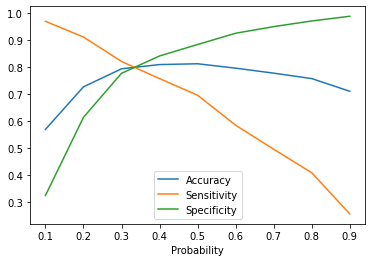

In [133]:
# Lets plot 'Accuracy', 'Sensitivity' and 'Specificity' for various probabilities

cutoff_df.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])

plt.show()

#### Inference from the above curve
1) 0.34 is the optimum point to take it as a cutoff probability 

In [134]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.863293,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.081444,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.135880,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.959543,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.227728,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [135]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.863293,7962,1,86
1,0,0.081444,5520,0,8
2,0,0.135880,1962,0,14
3,1,0.959543,1566,1,96
4,0,0.227728,9170,0,23


#### Ovrall accuracy 

In [136]:
# Let's check the 'overall accuracy'

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8041431261770244

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3181,  772],
       [ 476, 1943]], dtype=int64)

In [138]:
TP = confusion[1,1]    # True positives 
TN = confusion[0,0]    # True negatives
FP = confusion[0,1]    # False positives
FN = confusion[1,0]    # False negatives

#### Sensitivity  

In [139]:
# Let's see the 'sensitivity' of our logistic regression model

TP / float(TP+FN)

0.6965688300950806

#### Specificity

In [140]:
# Let's see 'specificity' of our logistic regression model

TN / float(TN+FP)

0.8846445737414622

In [141]:
# Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3181,  772],
       [ 476, 1943]], dtype=int64)

### Precision and Recall

#### Precision

In [143]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7156537753222836

#### Recall

In [144]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8032244729226953

#### Precision,-Recall curve

In [145]:
from sklearn.metrics import precision_score, recall_score

In [146]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7156537753222836

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8032244729226953

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

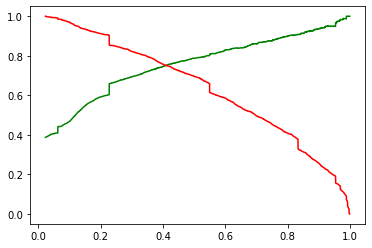

In [150]:
plt.plot(thresholds, p[:-1], "g-")

plt.plot(thresholds, r[:-1], "r-")

plt.show()

### Scaling Test set

In [151]:
# Scaling the Test-set
num_cols = X_test.select_dtypes(include = ['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,...,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
3504,-0.058621,-0.108519,0.416452,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4050,-1.150166,-0.888077,-1.263530,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7201,-0.422469,0.420993,-0.143542,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1196,0.305228,-0.110357,0.976446,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8219,1.396773,-0.433947,-0.283540,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [152]:
# feature variable
X_test = X_test[col]

X_test.head()

,Total Time Spent on Website,Lead Origin_lead add form,What is your current occupation_working professional,Lead Source_Google,Lead Source_direct traffic,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_olark chat conversation,Last Notable Activity_sms sent
3504,-0.108519,0,0,0,0,1,0,0,0,0,0,0
4050,-0.888077,1,0,0,0,0,0,0,0,0,0,1
7201,0.420993,0,0,0,1,0,0,0,0,0,0,1
1196,-0.110357,0,0,0,0,1,0,0,0,0,0,0
8219,-0.433947,0,0,0,1,0,0,0,0,0,0,0


In [153]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [154]:
# Predictions on test-set

y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

3504    0.187222
4050    0.953592
7201    0.579536
1196    0.186912
8219    0.114164
8747    0.226360
9048    0.769204
6524    0.135804
7693    0.303317
8187    0.953592
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
y_pred_1.head()

,0
3504,0.187222
4050,0.953592
7201,0.579536
1196,0.186912
8219,0.114164


In [158]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [159]:
# Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

In [161]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)

In [162]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.187222
1,1,4050,0.953592
2,0,7201,0.579536
3,0,1196,0.186912
4,1,8219,0.114164


In [163]:
# Renaming the column 

y_pred_final = y_pred_final.rename(columns = { 0 : 'Converted_prob'})

In [164]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.187222
1,1,4050,0.953592
2,0,7201,0.579536
3,0,1196,0.186912
4,1,8219,0.114164


In [165]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [166]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.187222,19
1,4050,1,0.953592,95
2,7201,0,0.579536,58
3,1196,0,0.186912,19
4,8219,1,0.114164,11


In [167]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [168]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.187222,19,0
1,4050,1,0.953592,95,1
2,7201,0,0.579536,58,1
3,1196,0,0.186912,19,0
4,8219,1,0.114164,11,0


#### Overall Accuracy

In [169]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8004393994873673

In [170]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1310,  379],
       [ 166,  876]], dtype=int64)

In [171]:
TP = confusion[1,1]    # True positives 
TN = confusion[0,0]    # True negatives
FP = confusion[0,1]    # False positives
FN = confusion[1,0]    # False negatives

#### Sensitivity

In [172]:
TP / float(TP+FN)

0.8032244729226953

#### Specificity

In [173]:
TN / float(TN+FP)

0.8047052871237035

### Precision and Recall 

#### Precision

In [175]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.69800796812749

#### Recall

In [176]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8406909788867563

# FINAL OBSERVATIONS

## 1) Train Data-set
1) Accuracy = 80.41%

2) Sensitivity = 69.65%

3) Specificity = 88.46%

## 2) Test Data-set
1) Accuracy = 80.04%

2) Sensitivity = 80.32%

3) Specificity = 80.47%